In [5]:
!pip install pandas_datareader

In [6]:
import pandas_datareader.wb as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Fetch population data for the latest year available
data = wb.download(indicator='SP.POP.TOTL', country='all', start=2020, end=2020)

# Reset index for easy use
data.reset_index(inplace=True)

# Show the first few rows
data.head()


<ipython-input-7-458775835>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator='SP.POP.TOTL', country='all', start=2020, end=2020)


,country,year,SP.POP.TOTL
0,Africa Eastern and Southern,2020,694446100.0
1,Africa Western and Central,2020,474569351.0
2,Arab World,2020,453723239.0
3,Caribbean small states,2020,3092577.0
4,Central Europe and the Baltics,2020,102046650.0


In [8]:
# Rename columns for clarity
data.columns = ['Country', 'Year', 'Population']

# Drop any missing values and group by country
data = data.dropna()

# Sort by population (top 10 countries)
top_10 = data.sort_values(by='Population', ascending=False).head(10)
top_10


,Country,Year,Population
48,World,2020,7.856139e+09
18,IDA & IBRD total,2020,6.667541e+09
27,Low & middle income,2020,6.438170e+09
33,Middle income,2020,5.758609e+09
17,IBRD only,2020,4.879367e+09
5,Early-demographic dividend,2020,3.396051e+09
29,Lower middle income,2020,2.966397e+09
47,Upper middle income,2020,2.792212e+09
6,East Asia & Pacific,2020,2.369439e+09
22,Late-demographic dividend,2020,2.316785e+09


<ipython-input-9-1813310467>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Country', y='Population', palette='viridis')


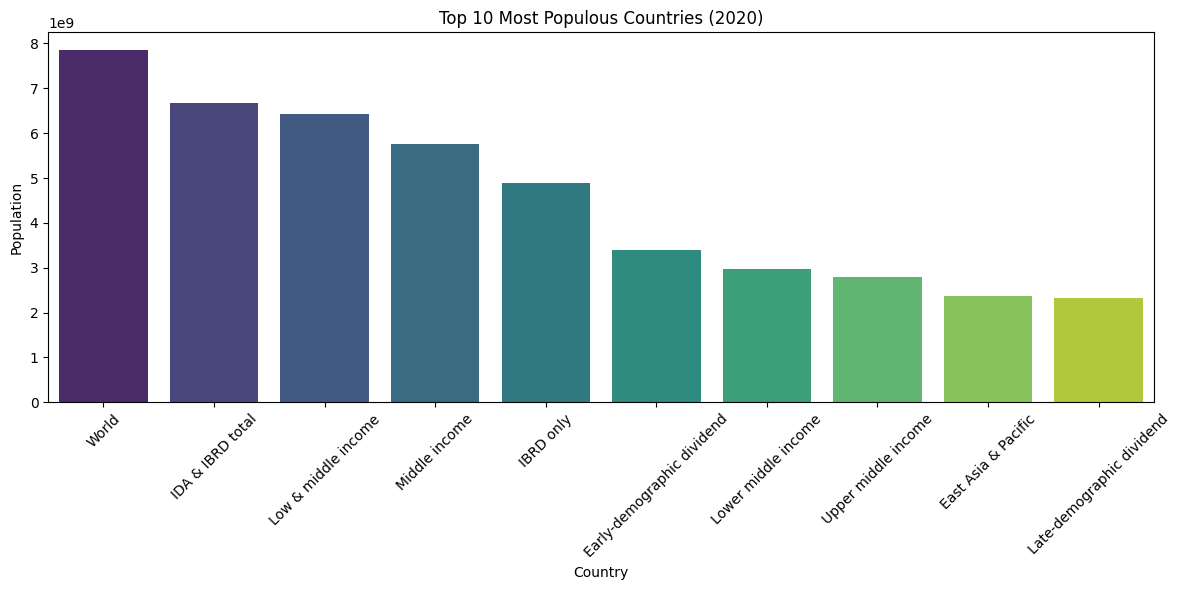

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Country', y='Population', palette='viridis')
plt.title('Top 10 Most Populous Countries (2020)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


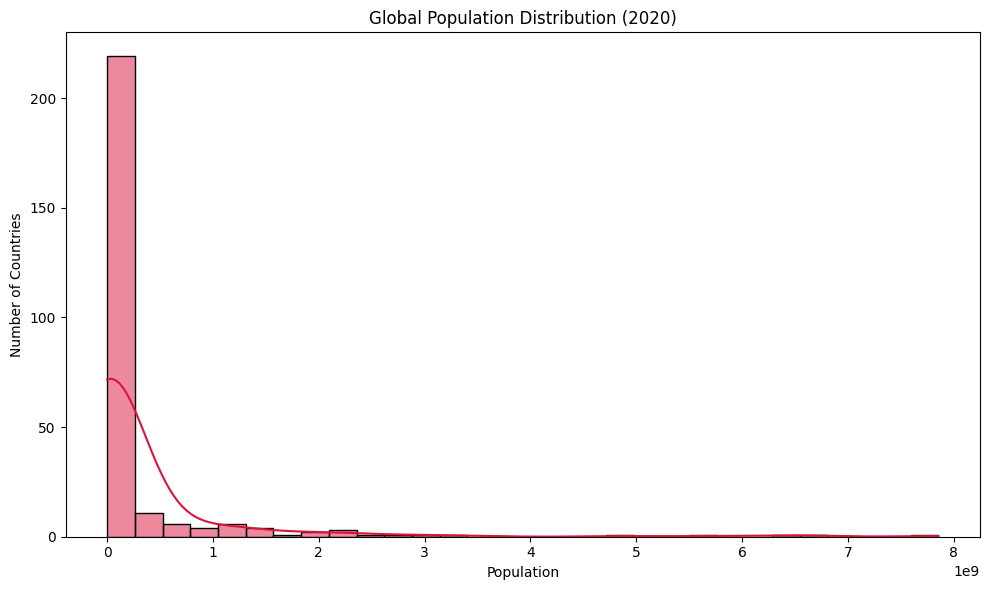

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Population'], bins=30, kde=True, color='crimson')
plt.title('Global Population Distribution (2020)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()
